In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ratings = pd.read_csv(f'../data_loading/mindreader/ratings.csv')

uri_ratings = ratings[['uri', 'userId']].groupby('uri').count()
uri_ratings.columns = ['ratings']

real_ratings = ratings[ratings.sentiment != 0][['uri', 'userId']].groupby('uri').count()
real_ratings.columns = ['ratings']

entities = pd.read_csv(f'../data_loading/mindreader/entities.csv')
entities.labels = entities.labels.str.split('|')
entities['all_ratings'] = entities.uri.isin(uri_ratings.index)
entities['real_ratings'] = entities.uri.isin(real_ratings.index)

1.0
1.0
1.0
1.0
1.0
{'Decade': {'num_entities': 0.0, 'num_rated_all': 0.0, 'num_rated_real': 1.0}, 'Category': {'num_entities': 0.2305084745762712, 'num_rated_all': 0.07457627118644068, 'num_rated_real': 0.6949152542372882}, 'Movie': {'num_entities': 0.04129554655870445, 'num_rated_all': 0.34898785425101214, 'num_rated_real': 0.6097165991902834}, 'Company': {'num_entities': 0.33814432989690724, 'num_rated_all': 0.27628865979381445, 'num_rated_real': 0.38556701030927837}, 'Person': {'num_entities': 0.6917623487709024, 'num_rated_all': 0.18571318486553132, 'num_rated_real': 0.12252446636356631}}


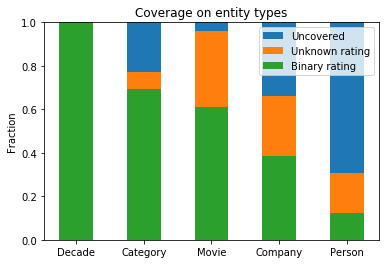

In [101]:
def has_label(label):
    return entities[entities.labels.apply(lambda item: label in item)]

groups =['Decade', 'Category', 'Movie', 'Company', 'Person']
group_statistics = dict()

for group in groups:
    df = has_label(group)
    
    num_e = len(df)
    num_a = len(df[df.all_ratings & ~df.real_ratings])
    num_u = len(df[~df.all_ratings & ~df.real_ratings])
    num_r = len(df[df.real_ratings])
    
    frac_u = num_u / num_e
    frac_a = num_a / num_e
    frac_r = num_r / num_e
    
    group_statistics[group] = {
        'num_entities': frac_u,
        'num_rated_all': frac_a,
        'num_rated_real': frac_r,
    }
    
    print(frac_u + frac_a + frac_r)
    
# Get entities
num_entities = [group_statistics[group]['num_entities'] for group in groups]
num_rated_all = [group_statistics[group]['num_rated_all'] for group in groups]
num_rated_real = [group_statistics[group]['num_rated_real'] for group in groups]

num_entities = np.array(num_entities)
num_rated_all = np.array(num_rated_all)
num_rated_real = np.array(num_rated_real)
w = 0.35
plt.bar(groups, num_entities, width=0.5, bottom=num_rated_all + num_rated_real)
plt.bar(groups, num_rated_all, width=0.5, bottom=num_rated_real)
plt.bar(groups, num_rated_real, width=0.5)

plt.legend(['Uncovered', 'Unknown rating', 'Binary rating'], loc='best')
plt.ylabel('Fraction')
plt.title('Coverage on entity types')
plt.savefig('coverage.png')
plt.show()
print(group_statistics)